## Customer Service Requests Analysis
### Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques 
### to understand the pattern in the data and also visualize the major complaint types.
### Domain: Customer Service

In [1]:
# Importing packages required for this project
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)

In [2]:
service_request_df = pd.read_csv(r"G:\Simplilearn\Python\Customer_Service_Analysis\311_Service_Requests_from_2010_to_Present.csv",
                                 low_memory = 0)

### Data Wrangling

In [3]:
# Converting Created Date & Closed Date to datetime type
service_request_df['Created Date'] = pd.to_datetime(service_request_df['Created Date'])
service_request_df['Closed Date'] = pd.to_datetime(service_request_df['Closed Date'])

# Creating New column - request closing time: Time take to resolve the incident
service_request_df['Request_Closing_Time'] = pd.to_datetime(service_request_df['Closed Date']) - pd.to_datetime(service_request_df['Created Date'])

# Displaying the dataset
service_request_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16


## Explorotart Data Analysis

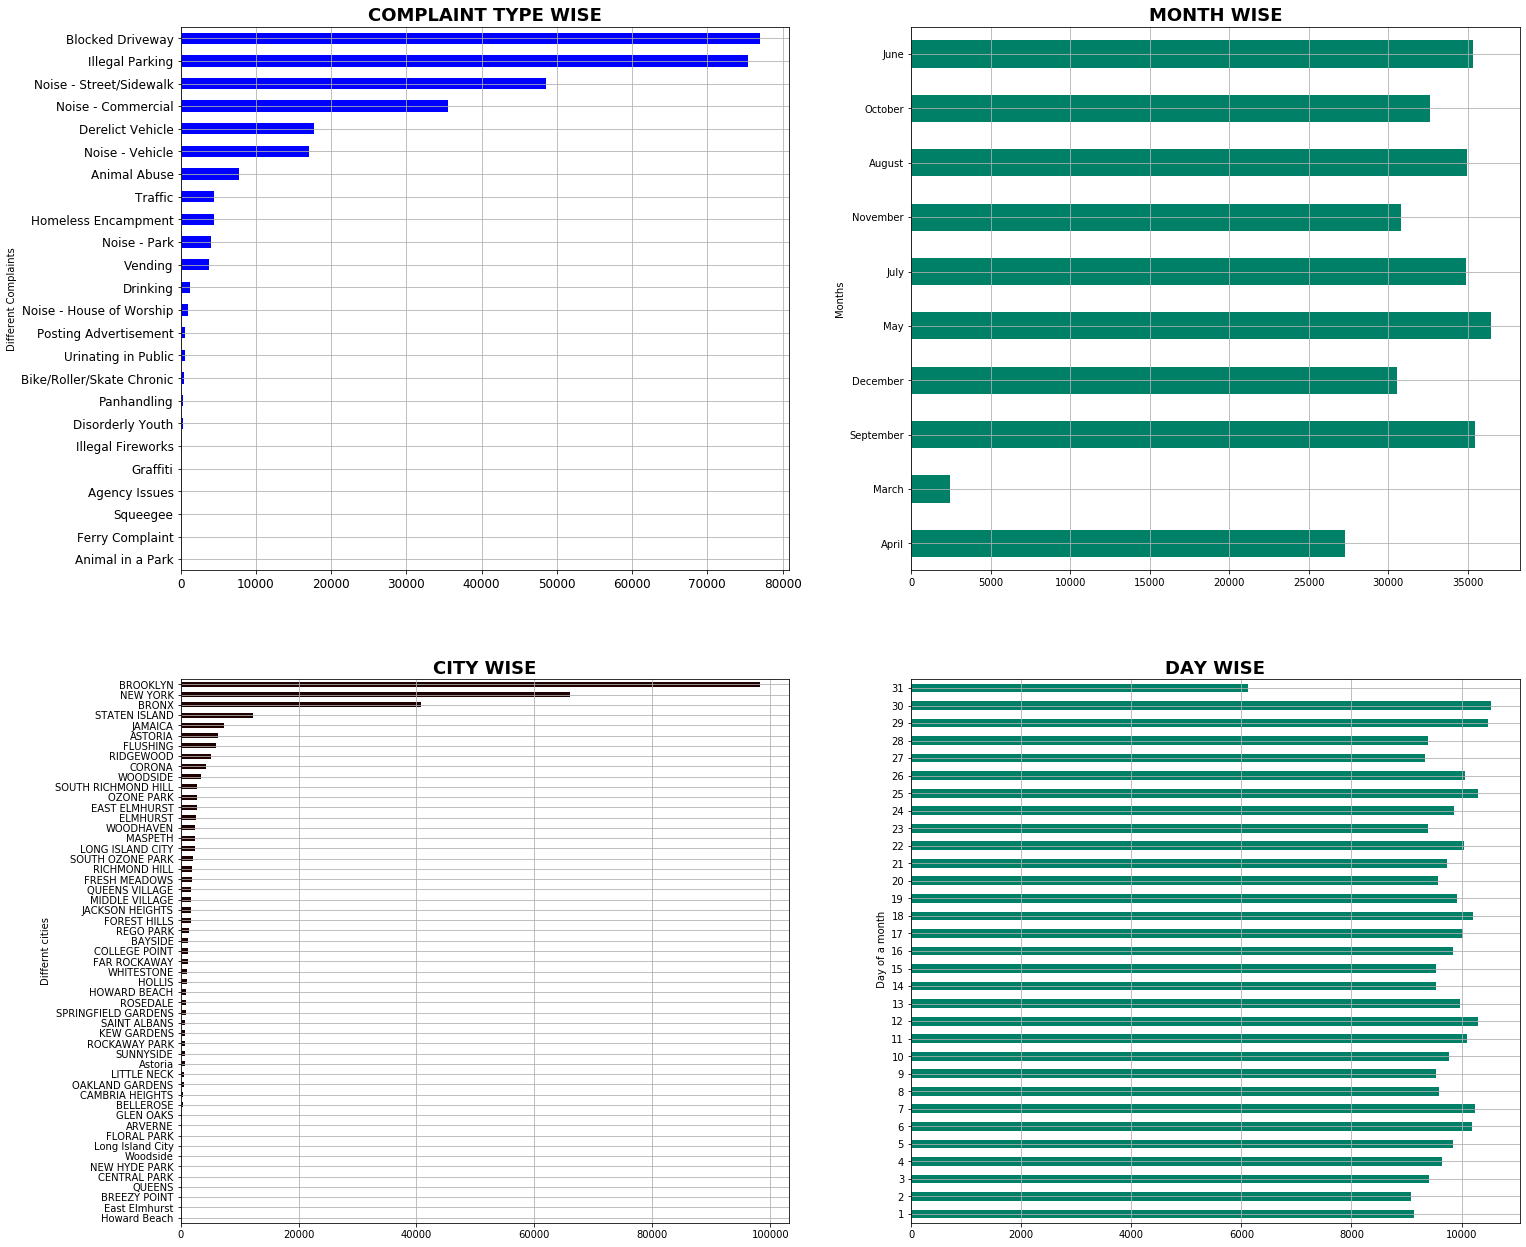

In [4]:
f,ax = plt.subplots(2,2,figsize=(24,22))
plt.style.use('ggplot')

# Count of incident reported based on different types of complaint
Comp_type = service_request_df['Complaint Type'].value_counts(ascending=True)
Comp_type.plot(kind = 'barh',colormap = "winter",fontsize = 12,ax=ax[0,0])
ax[0,0].set_title("Complaint Type wise".upper(),weight='bold',size = 18)
ax[0,0].set_ylabel("Different Complaints")


# Count of incident reported based on city located

inc_city = service_request_df.City.value_counts(ascending=True)
plt.style.use('bmh')
inc_city.plot(kind= 'barh',colormap = 'pink',ax=ax[1,0])
ax[1,0].set_title("City Wise".upper(),weight='bold',size = 18)
ax[1,0].set_ylabel("Differnt cities")


# Count of incident reported based on month of a year

mon = pd.DatetimeIndex(service_request_df['Created Date']).month_name().value_counts(sort=False)
mon.plot(kind = 'barh',colormap='summer',ax=ax[0,1])
ax[0,1].set_title("Month Wise".upper(),weight='bold',size = 18)
ax[0,1].set_ylabel("Months")

# Count of incident reported based on day of the month

days = pd.DatetimeIndex(service_request_df['Created Date']).day.value_counts(sort=False)
days.plot(kind='barh',colormap='summer',ax=ax[1,1])
ax[1,1].set_title("Day wise".upper(),weight='bold',size = 18)
ax[1,1].set_ylabel(" Day of a month")


plt.show()


## Inference from above graphs

### Coomplaint type wise :
#### 1. Blocked Driveway, Illegal parking & Noise (Street/sidewalk and Commercial) are highest common request that is being reported
#### 2. The graph shows that around 7-8 types of complaint are very less significant in terms of counts 

### City Wise report:
#### 1. Brooklyn tops all the incident reportted , hence we need more resources as compared to other cities
#### 2. NewYork , Bronx & Staten Island are the next top cities for incdent reported

### Month Wise report:
#### 1. In the month of March Agency gets less number of calls
#### 2. Rest all months number of calls are similar

### Day wise report:
#### 1. There is no significant difference in the calls during starting ,ending and mid-days of the month

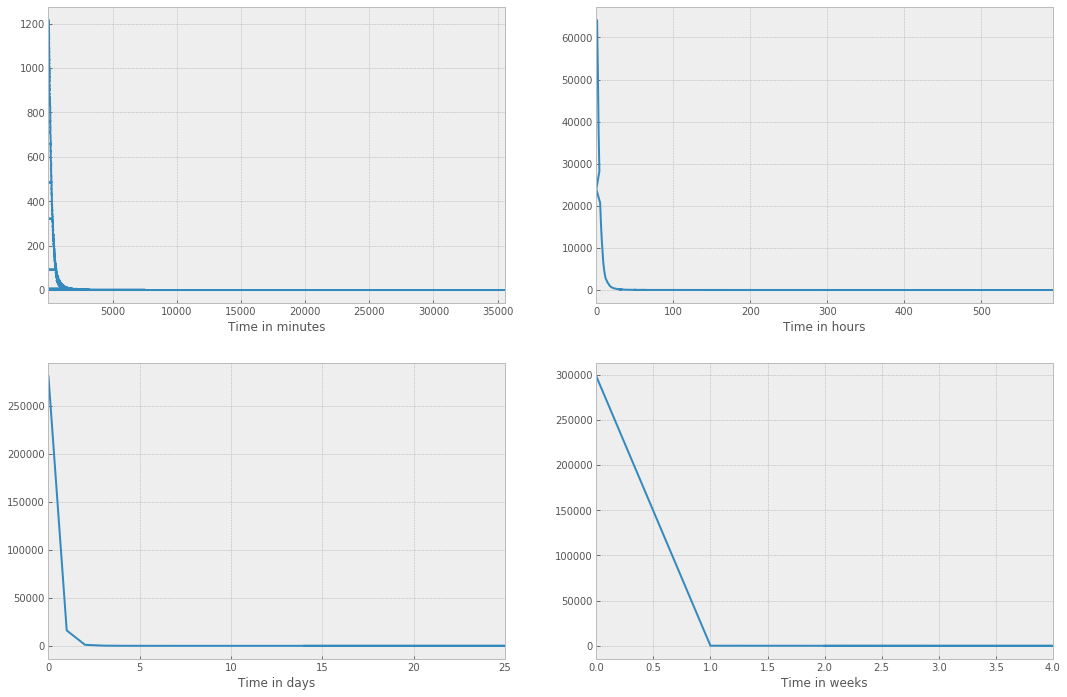

In [5]:

flg,ax = plt.subplots(2,2,figsize=(18,12))

m = service_request_df['Request_Closing_Time']/np.timedelta64(1,'m')
m.round().value_counts().plot(kind='line',ax=ax[0,0])
#ax[0,0].set_title("Minutes Wise Resolution")
ax[0,0].set_xlabel("Time in minutes")

h = service_request_df['Request_Closing_Time']/np.timedelta64(1,'h')
h.round().value_counts().plot(ax=ax[0,1])
#ax[0,1].set_title("Minutes Wise Resolution")
ax[0,1].set_xlabel("Time in hours")

D = service_request_df['Request_Closing_Time']/np.timedelta64(1,'D')
D.round().value_counts().plot(ax=ax[1,0])
#ax[1,0].set_title("Minutes Wise Resolution")
ax[1,0].set_xlabel("Time in days")


W = service_request_df['Request_Closing_Time']/np.timedelta64(1,'W')
W.round().value_counts().plot(ax=ax[1,1])
#ax[1,1].set_title("Minutes Wise Resolution")
ax[1,1].set_xlabel("Time in weeks")


plt.show()



## Inference from above graphs
#### 1. Maximum number of incidents are closed on the same day saying more precisely within few hours
#### 2. None of the issue has taken more than a week to resolve
#### 3. Agency has excellent response time

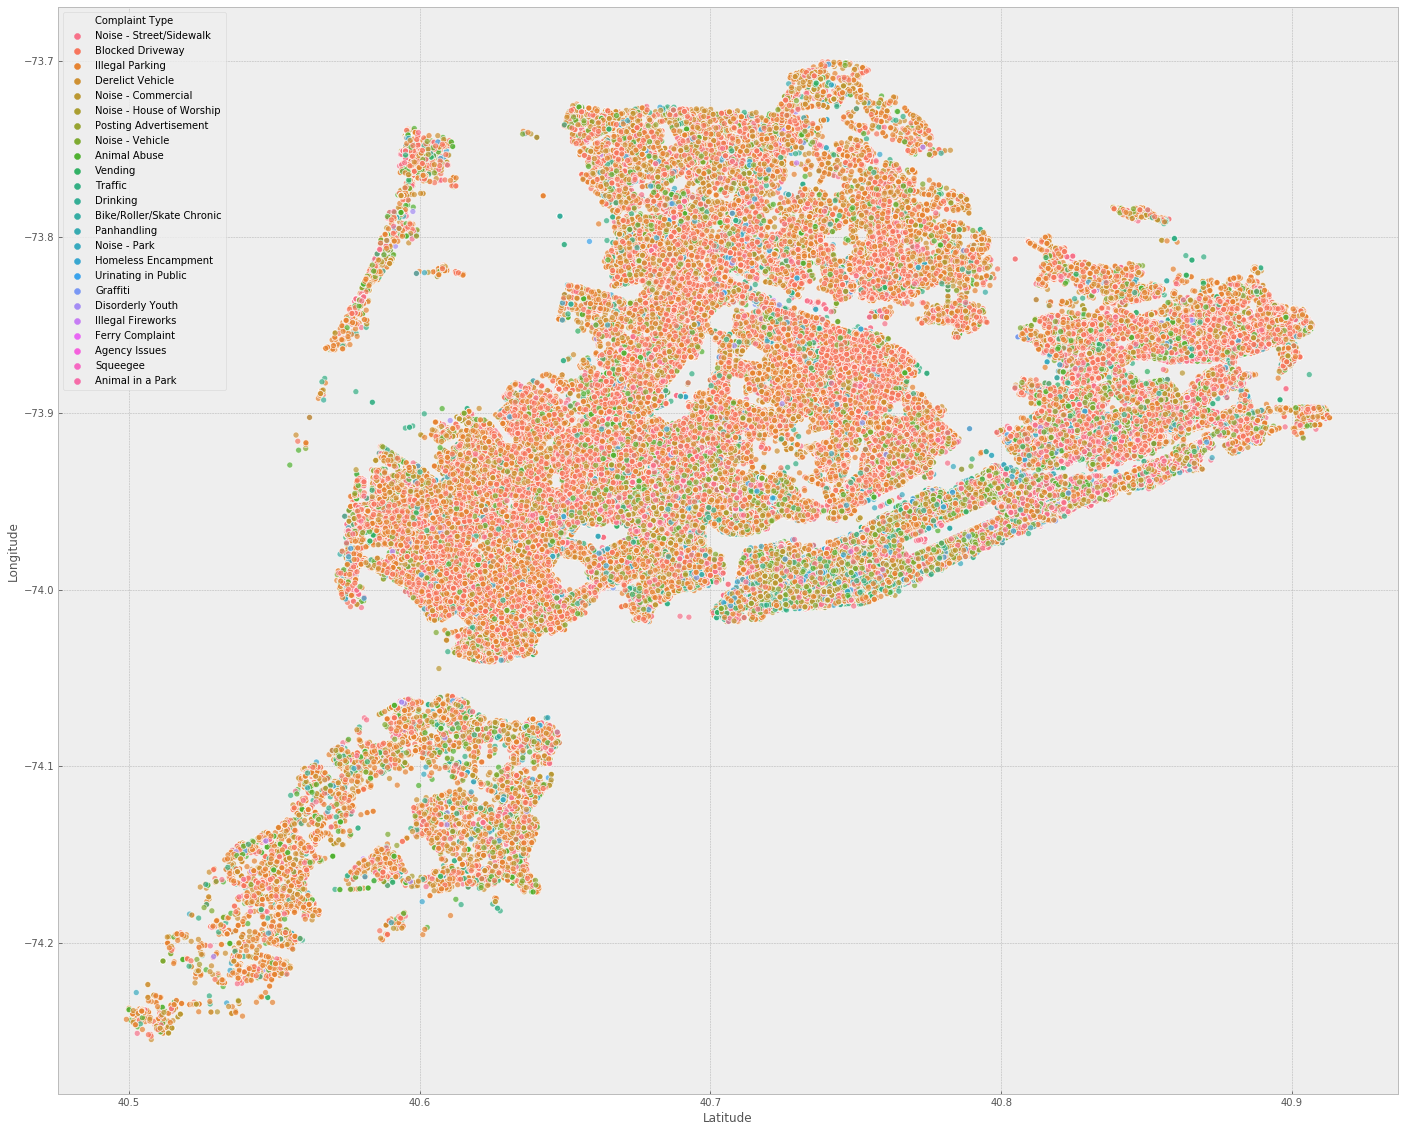

In [6]:
flg = plt.figure(figsize = (24,20))

# Plotting the types of complaint across all location
sns.scatterplot(x="Latitude" , y = "Longitude",data = service_request_df,hue="Complaint Type",alpha = 0.7)
# This shows that complaint is spread all over NY and does not belong to specific region
# For NY Noise , Blocked Drive way and Illegal parking is the most popular complaint
plt.show()

## Interpretation from above plot
#### 1. We can use longitute and latitude to plot the map of NY and see the different type of complaints
#### 2. It is clearly visible that all types of compaints are coming from whole map

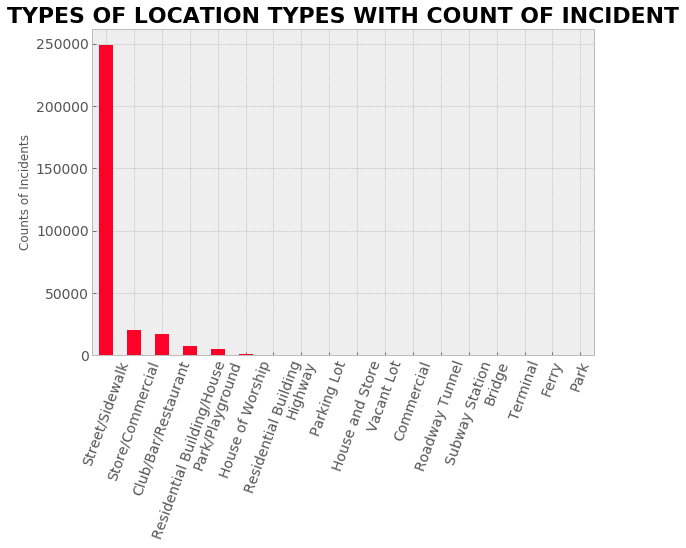

In [7]:
fig = plt.figure(figsize=(9,6))

l = service_request_df['Location Type'].value_counts(ascending=False)
l.plot(kind='bar',colormap= 'gist_rainbow',rot=70,fontsize = 14)
plt.title("Types of location types with count of Incident".upper(),weight ='bold',size=22)
plt.ylabel("Counts of Incidents")
plt.show()

In [8]:
M = service_request_df['Request_Closing_Time']/np.timedelta64(1,'h') #- Run only once
service_request_df['Request_Closing_Time'] = M.round()
test2 = service_request_df.groupby(['Location Type','Complaint Type']).Request_Closing_Time.mean()
t2 = pd.DataFrame(test2)

In [9]:
t2

Request_Closing_Time
Location Type              Complaint Type                                 
Bridge                     Homeless Encampment                    4.000000
Club/Bar/Restaurant        Drinking                               4.534247
                           Noise - Commercial                     3.056113
                           Urinating in Public                    7.904762
Commercial                 Animal Abuse                           5.370968
Ferry                      Ferry Complaint                             NaN
Highway                    Derelict Vehicle                       8.153846
                           Homeless Encampment                    3.333333
                           Traffic                                3.440860
House and Store            Animal Abuse                           5.053763
House of Worship           Noise - House of Worship               3.174757
Park                       Animal in a Park                     337.000000
Park/Playground            Animal Abuse                           3.688525
                           Drinking                               3.459184
                           Homeless Encampment                    3.917847
                           Illegal Fireworks                      5.000000
                           Noise - Park                           3.397165
                           Panhandling                            1.500000
                           Urinating in Public                    2.842105
                           Vending                                3.495238
Parking Lot                Animal Abuse                           5.500000
                           Posting Advertisement                  2.000000
Residential Building       Animal Abuse                           4.801762
Residential Building/House Animal Abuse                           5.403267
                           Bike/Roller/Skate Chronic              3.560000
                           Disorderly Youth                       3.896104
                           Drinking                               3.695502
                           Graffiti                               5.910714
                           Homeless Encampment                    4.925738
                           Illegal Fireworks                      3.060606
...                                                                    ...
Store/Commercial           Graffiti                               5.562500
                           Homeless Encampment                    4.222656
                           Illegal Fireworks                      2.000000
                           Noise - Commercial                     3.214010
                           Panhandling                            4.316667
                           Posting Advertisement                  2.333333
                           Urinating in Public                    3.378788
                           Vending                                3.953704
Street/Sidewalk            Animal Abuse                           5.110020
                           Bike/Roller/Skate Chronic              3.736994
                           Blocked Driveway                       4.741758
                           Derelict Vehicle                       7.351616
                           Disorderly Youth                       3.512438
                           Drinking                               3.611111
                           Graffiti                              11.960000
                           Homeless Encampment                    4.231011
                           Illegal Fireworks                      2.536000
                           Illegal Parking                        4.496825
                           Noise - Street/Sidewalk                3.433728
                           Noise - Vehicle                        3.580916
                           Panhandling                            4.439462
    

# Statiscal Testing & Hypothesis Testing
### 1. Whether the average response time across complaint types is similar or not (overall)

#### Establishing the Null and Alternate Hypothesis
#### H0 : There is no relationship between complaint types & time taken to reolve the incident
#### HA : There is relationship between complaint types & time taken to reolve the incident
### In other words:
#### H0 : There is no significant difference in avg. response time across complaint types
#### HA : There is significant difference in avg. response time across complaint types

In [10]:
# Renaming the columns for our ease in the operations
service_request_df.rename(columns={'Complaint Type':'Complaint_Type'},inplace = True)

alpha = 0.05

model = ols('Request_Closing_Time ~ Complaint_Type',service_request_df).fit()
result = sm.stats.anova_lm(model)
print(result)
print("p-value:",model.f_pvalue)
print("Alpha Value:",alpha)

if model.f_pvalue <= alpha:
    print("Rejecting H0 "" There is significant difference in avg. response time across complaint types")
else:
    print("Fail to reject H0 : There is no significant difference in avg. response time across complaint types")

                      df        sum_sq       mean_sq           F  PR(>F)
Complaint_Type      23.0  4.056305e+05  17636.106594  491.835099     0.0
Residual        298511.0  1.070394e+07     35.857763         NaN     NaN
p-value: 0.0
Alpha Value: 0.05
Rejecting H0  There is significant difference in avg. response time across complaint types


#### Since we see that p-value is less than alpha even at 1%, we are rejecting the Null Hypothesis.
#### So there is significant difference in avg. response time across complaint types

### 2. Are the type of complaint or service requested and location related?
#### We will use chi square test as both variables are categorical

In [11]:
# Renaming the column for our ease and dropping NA values as the counts significantly very less
service_request_df.rename(columns={'Location Type':'Location_Type'},inplace = True)
req = service_request_df.dropna(subset=['Location_Type'])

## Hypothesis:
#### H0 : There is no relationship between Location Type & Complaint Type
#### HA : There is relationship between Location Type & Complaint Type

In [15]:

contigency_table = pd.crosstab(req['Location_Type'],req['Complaint_Type'])
chi_square , p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(contigency_table)

alpha = 0.05

print("First method".upper())
print('Significance level: ',alpha)
print('Degree of Freedom: ',degrees_of_freedom)
print('p-value:',p_value)
print('chi_square:',chi_square)

if p_value <= alpha:
    print("Rejecting H0 - There is relationship between two Location Type & Complaint Type")
else:
    print("Fail to reject H0 - There is no relationship between location type & compliant Tyoe")



row = len(contigency_table.iloc[:,0])
col = len(contigency_table.iloc[0,:])
degree = (row -1) * (col - 1)

observed_values = contigency_table.values
expected_values = expected_frequencies




chi_sq = sum([(o-e)**2./e for o,e in 
             zip(observed_values,expected_values)])

chi_sq_stat = chi_sq[0] + chi_sq[1]

critical_value = chi2.ppf(q=1-alpha,df = degree)
p_val = 1 - chi2.cdf(x = chi_sq_stat,df = degree)

print("Second method".upper())
print('Significance level: ',alpha)
print('Degree of Freedom: ',degree)
print('chi-square statistic:',chi_sq_stat)
print('critical_value:',critical_value)
print('p-value:',p_val)



if chi_sq_stat >= critical_value:
    print("Rejecting H0 - There is relationship between two Location Type & Complaint Type")
else:
    print("Fail to reject H0 - There is no relationship between location type & compliant Tyoe")

FIRST METHOD
Significance level:  0.05
Degree of Freedom:  374
p-value: 0.0
chi_square: 1638407.5805696272
Rejecting H0 - There is relationship between two Location Type & Complaint Type
SECOND METHOD
Significance level:  0.05
Degree of Freedom:  374
chi-square statistic: 456729.09664751467
critical_value: 420.09408303637986
p-value: 0.0
Rejecting H0 - There is relationship between two Location Type & Complaint Type
